# Hartree Fock 

# CÃ¡lculo autoconsistente Ground State Helio

DarÃ­o Mitnik

In [1]:
from numpy import  linspace, zeros, array, pi, sqrt
from scipy.linalg import  eigh , eigvalsh

%matplotlib inline
from matplotlib.pyplot import plot, title, legend, show, axhline, \
                              xlabel, ylabel, axis, figure
    

In [2]:
nsize = 4
S = zeros((nsize,nsize))  # Overlap
H = zeros((nsize,nsize))  # One-electron Hamiltonian
G = zeros((nsize,nsize))  # Two-electron Operator
F = zeros((nsize,nsize))  # Fock Operator Hij + Gij

# Gaussian Basis  Ci*exp(-Alpha*r^2)
Alpha = zeros((nsize))    
Ci = zeros((nsize))

EnergyGS = []

In [3]:
# Datos Iniciales
Alpha[0] = 0.298073
Alpha[1] = 1.242567
Alpha[2] = 5.782948
Alpha[3] = 38.47497
#Alpha[4] = 0.1
#Alpha[5] = 5
#Alpha[6] = 20.
#Alpha[7] = 50.0

In [4]:
# CÃ¡lculo de Overlaps  Sij=<xi|xj>

def overlap(Alpha,p,q):
    spq = ( pi / (Alpha[p] + Alpha[q]) )**(3./2.)
    
    return spq

for i in range(0,nsize):
    for j in range(i,nsize):        
        S[i,j]=overlap(Alpha,i,j)
        S[j,i]=S[i,j]


In [5]:
 # CÃ¡lculo de Hamiltoniano Hij=<xi| H |xj>


# CÃ¡lculo de EnergÃ­a CinÃ©tica  Tij=<xi|-1/2 D^2 |xj>
def Tkin(Alpha,p,q):
    rnum = 3 * pi**(3./2.) * Alpha[p] * Alpha[q]
    rden =  (Alpha[p] + Alpha[q] )**(5./2.)    
    Tpq = rnum/rden    
    return Tpq


# CÃ¡lculo de EnergÃ­a Potencial  Vij=<xi|-Z/r |xj>
def Vpot(Alpha,p,q):
    Vpq = 2 * ( -2*pi )  /  (Alpha[p] + Alpha[q])    
    return Vpq

for i in range(0,nsize):
    for j in range(i,nsize): 
        H[i,j]=Tkin(Alpha,i,j) + Vpot(Alpha,i,j)
        H[j,i]=H[i,j]
   

In [6]:
 # CÃ¡lculo de RepulsiÃ³n InterelectrÃ³nica 
 #   Qirjs=<xi(r1)xr(r2)| 1/|r1-r2| |xj(r1)xs(r2)>


# CÃ¡lculo de Integral de RepulsiÃ³n
 #   Qirjs=<xi(r1)xr(r2)| 1/|r1-r2| |xj(r1)xs(r2)>
def Qirjs(Alpha,i,r,j,s):
    rnum = 2 * pi**(5./2.) 
    sqrsum = sqrt(Alpha[i]+Alpha[j]+Alpha[r]+Alpha[s])
    rden =  (Alpha[i]+Alpha[j])*(Alpha[r]+Alpha[s])*sqrsum    
    Qirjs = rnum/rden    
    return Qirjs



## IteraciÃ³n Hartree

In [99]:
# AcÃ¡ Itera Hartree


 # Esto lleva al elemento de matriz
 # Gij= Sum_rs Qirjs Cr Cs

# CÃ¡lculo de Elemento de Matriz  Vij=<xi|-Z/r |xj>
 # Gij= Sum_rs Qirjs Cr Cs

for i in range(0,nsize):
    for j in range(i,nsize):
        sum = 0.0
        for r in range(0,nsize):
            for s in range(0,nsize):
                sum = sum + Qirjs(Alpha,i,r,j,s)*Ci[r]*Ci[s]
        G[i,j]=sum
        G[j,i]=sum
   

In [100]:
# ConstrucciÃ³n de Operador Fock

for i in range(0,nsize):
    for j in range(i,nsize): 
        F[i,j]=H[i,j] + G[i,j]
        F[j,i]=F[i,j]
   

In [101]:
# SoluciÃ³n generalized eigenvalues (H-ES)(C)=0
# SÃ³lo Autovalores !

Ener = eigvalsh(F,S,type=1)
Ener

array([ -0.91412327,   0.5815142 ,   7.55426187,  61.02857702])

In [102]:
# SoluciÃ³n generalized eigenvalues (H-ES)(C)=0

Ener,coef = eigh(F,S,type=1)
Ci = coef[:,0]

In [103]:
# NormalizaciÃ³n de los coeficientes

sum = 0.0
for i in range(0,nsize):
    for j in range(0,nsize):
        sum = sum + Ci[i]*S[i,j]*Ci[j]
for i in range(0,nsize):
    Ci[i] = Ci[i]/sqrt(sum)

In [104]:
# EnergÃ­a Total


sum = 0.0
for i in range(0,nsize):
    for j in range(0,nsize):
        sum = sum + Ci[i]*Ci[j]*(2.0*H[i,j]+G[i,j])

EnergyGSnew = sum
EnergyGSnew

-2.8551600839385025

In [105]:
EnergyGS.append(EnergyGSnew)

In [106]:
EnergyGS

[-3.9885323142089351,
 -2.7290659114788491,
 -2.8907233747431555,
 -2.845554605983029,
 -2.8577918441290739,
 -2.8544421454201436,
 -2.855356618614842,
 -2.8551067816451137,
 -2.8551750241854199,
 -2.8551563828287003,
 -2.8551614748866272,
 -2.8551600839385025]

## Fin IteraciÃ³n

In [146]:
# CÃ¡lculo de la funciÃ³n de onda
    
def psi(Ci,Alpha,x):

    from math import  exp

    nsize = len(Ci) 
    sum = 0.0
    for i in range(0,nsize):
        sum = sum + Ci[i]*exp(-Alpha[i]*x**2)
    return sum

In [171]:
# GeneraciÃ³n de la SoluciÃ³n

# array definitions
npts = 100
xmin=0.0
xmax=12.0
dx =  (xmax-xmin)/(npts-1)

x = linspace(xmin,xmax,npts)
wave1s = zeros(npts)

for i in range(0,npts):
        wave1s[i] = psi(-Ci,Alpha,x[i])

In [175]:
# Normalization

rsum = 0.0
for i in range(0,npts):
        P1s = x[i]*wave1s[i]
        rsum = rsum +  P1s**2
rsum = rsum * dx
rnorm = 1.0/sqrt(rsum)

isign = 1
if wave1s[2]<0:
    isign = -1

wave1s = wave1s*rnorm*isign 


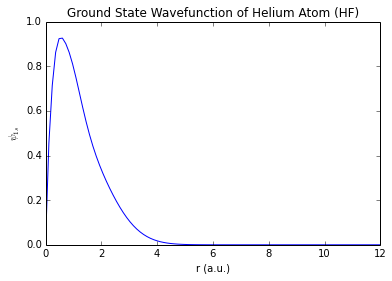

In [176]:
# Ploteo de SoluciÃ³n


plot(x,x*wave1s);
#axis([xmin,xmax,-0.6,0.25]);
title("Ground State Wavefunction of Helium Atom (HF)");
xlabel("r (a.u.)");
ylabel("$\psi_{1s}$");